<a href="https://colab.research.google.com/github/ErnestoTejeda7/Simulacion_II/blob/main/Unidad%20II/Lanzamiento_3_monedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

## *RUINA DEL JUGADOR*

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

### Analiticamente:

Primero definimos la matriz de transición del proceso en la forma

\begin{equation}
P=\begin{bmatrix}
Q & R\\
0 & I
\end{bmatrix}
\end{equation}

Utilizamos la matriz fundamental  $$T=(I-Q)^{-1}$$

La cual nos dice el numero de transiciones promedio en que el proceso da vueltas en el estado $j$ antes de llegar a $algun$ estado absobente, dado que empezo en el estado $i$

In [17]:
p=1/2
q=1/2
P=np.array([
    [0,p,0,0,p,0],
    [q,0,p,0,0,0],
    [0,q,0,p,0,0],
    [0,0,q,0,0,p],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]
])

In [30]:
Q=P[0:4,0:4]
R=P[0:4,4:]
Q

array([[0. , 0.5, 0. , 0. ],
       [0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5],
       [0. , 0. , 0.5, 0. ]])

In [130]:
T=np.linalg.inv(np.eye(4)-Q)
print("T=",T)

T= [[1.6 1.2 0.8 0.4]
 [1.2 2.4 1.6 0.8]
 [0.8 1.6 2.4 1.2]
 [0.4 0.8 1.2 1.6]]


Al sumar las intradas de la fila 2 (correspondiente al estado "2 monedas") obtenemos la cantidad de transiciones esperadas que el proceso realiza antes de llegar a algún estado absorbente dado que empezzó en el estado 2

In [131]:
T[1].sum()

5.999999999999999

La matriz siguiente nos dice la probabilidad de llegar a un estado absorbente específico dado que se comenzó en el estado $i$.

In [132]:
Pabsorcion=T@R
Pabsorcion

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8]])

Podemos notar que si comenzamos en el estado 2, la prob de ganar el juego es $0.4$ y la prob de ruina es $0.6$. Luego, la ganancia esperada del juego dado que comenzamos en el estado $2$ se calcula de la sig. manera:

$$E\ [ganancia]\ =\ (0.4)5+(0.6)0\ =\ 2$$

### Por simulación: 
Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

Para cada volado, la v.a. que indica si el jugador gana una moneda se disbribuye como una $Bernulli(p)$.
El juego completo se puede puede representar como un proceso estocástico, en el cual, cada estado es la cantidad de monedas que puede tener el jugador 1. La matriz de tansición es la siguiente:

\begin{equation}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
1-p & 0 & p & 0 & 0 & 0 \\
0 & 1-p & 0 & p & 0 & 0 \\
0 & 0 & 1-p & 0 & p & 0 \\
0 & 0 & p & 1-p & 0 & p \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{equation}

**PASO 2**. Formule la distribución de probabilidad de cada variable.

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule un lanzamiento.

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
# Esta función simula un solo juego y devuele la cantidad de munedas que tiene el jug1., tambien devuelve la cantida de volados 
# que se necesitaron

#El argumento grafica sirve para que sólo se grafique el primer experimento
def ruina_j(grafica,m1=2,m2=3, p=0.5):
    ganancia=m1 
    m_total=m1+m2 
    cuenta_volds=0 
    
    #lista que sirve para graficar el juego
    lgan=[ganancia]
    
    while ganancia>0 and ganancia<m_total:
        if random.random()<p:
            ganancia += 1 
        else:
            ganancia -= 1 
        cuenta_volds +=1 
        if grafica==0:
            lgan.append(ganancia)
            

    return ganancia, cuenta_volds, lgan
    

In [3]:
#esta función simula muchas veces la funcion anterior
def simu_ruina_j(N,m1=2,m2=3,p=0.5):
    
    #listas para guardar la aproximación en cada iteracion
    lgananacia=[]
    lvolados=[]
    lruina=[]
    
    sumag=0
    sumav=0
    ruina=0
    
    
    for i in range(N):
        (ganancia, cuenta_volds, l)=ruina_j(i, m1, m2, p)
        
        #La sig. condicion indicara en cada juego si el juegador gana o queda en ruina
        if ganancia==0:
            ruina+=1
        
        #El condicional sirve para saber si graficar o no el juego
        if i==0:
            lgan=l
            
        sumag=sumag+ganancia
        sumav=sumav+cuenta_volds
        
        lgananacia.append((sumag)/(i+1))
        lvolados.append((sumav)/(i+1))
        lruina.append(ruina/(i+1))
        
    return lgananacia, lvolados, lruina, lgan

In [4]:
N=2000
(lganancia, lvolados, lruina, lgan)=simu_ruina_j(N,m1=2,m2=3,p=0.5)

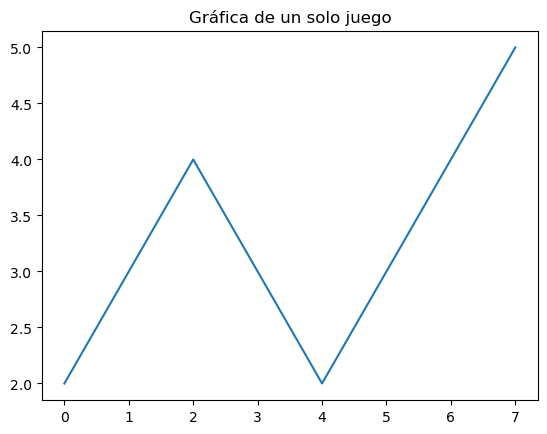

In [5]:
plt.plot(lgan)
plt.title('Gráfica de un solo juego')
plt.show()

In [6]:
print("Ganancia esperada:", lganancia[-1])
print("Nunero de juegos esperados: ", lvolados[-1])
print("Probabilida estimada de ruina: ", lruina[-1])

Ganancia esperada: 1.9325
Nunero de juegos esperados:  6.1915
Probabilida estimada de ruina:  0.6135


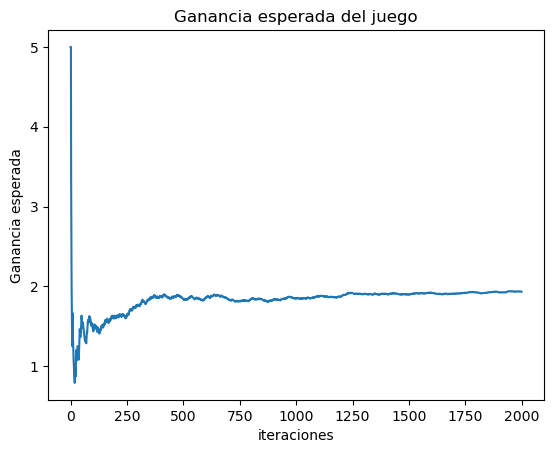

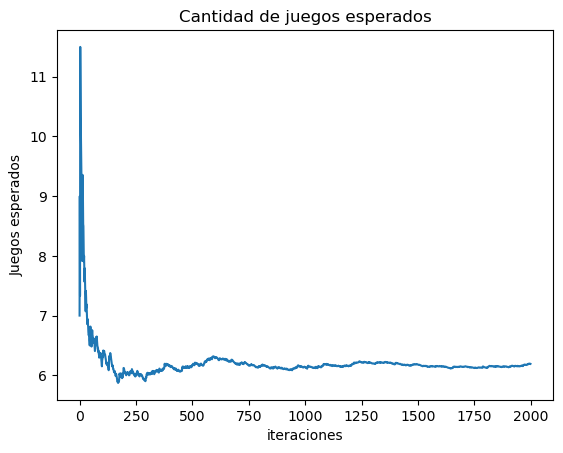

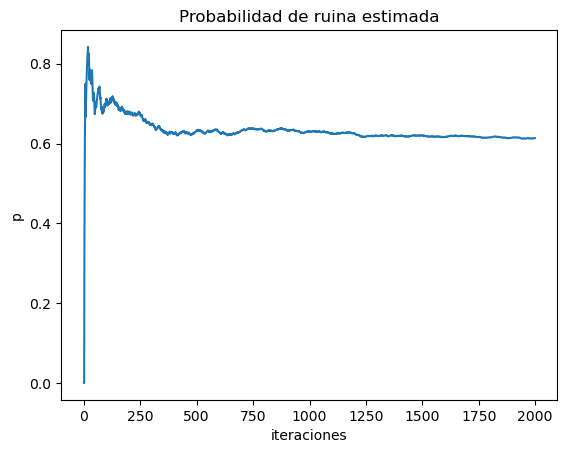

In [7]:
plt.plot(lganancia)
plt.xlabel('iteraciones')
plt.ylabel('Ganancia esperada')
plt.title('Ganancia esperada del juego')
plt.show()

plt.plot(lvolados)
plt.xlabel('iteraciones')
plt.ylabel('Juegos esperados')
plt.title('Cantidad de juegos esperados')
plt.show()

plt.plot(lruina)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad de ruina estimada')
plt.show()

**PASO 8**. Replique el modelo.

In [8]:
def simu2_ruina_j(N,M):
    #lista con las ganancia esperada de cada experimento
    Listag = []
    
    #lista con la cantidad de juegos esperados de cada experimento
    Listav = []
    
    #lista con la prob de ruina de cada experimento
    Listap = []
    
    for i in range(M):
        Listag.append(simu_ruina_j(N,m1=2,m2=3,p=0.5)[0][-1])
        Listav.append(simu_ruina_j(N,m1=2,m2=3,p=0.5)[1][-1])
        Listap.append(simu_ruina_j(N,m1=2,m2=3,p=0.5)[2][-1])
    return Listag, Listav, Listap

In [9]:
N=1000
M=1000
Listag, Listav, Listap = simu2_ruina_j(N,M)

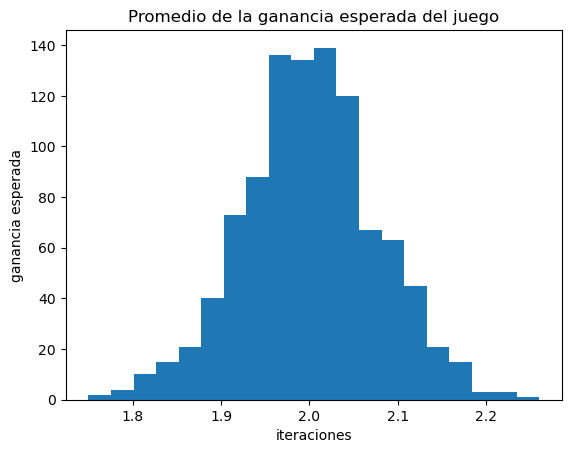

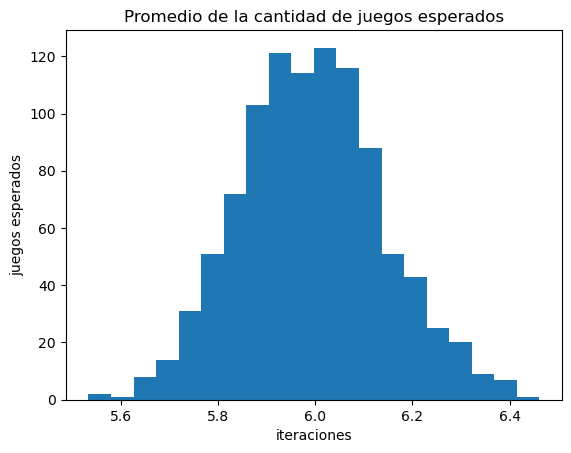

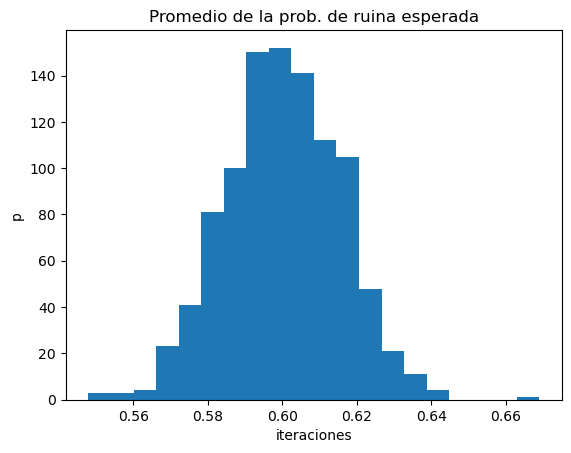

In [10]:
plt.hist(Listag, bins=20)
plt.xlabel('iteraciones')
plt.ylabel('ganancia esperada')
plt.title('Promedio de la ganancia esperada del juego')
plt.show()

plt.hist(Listav, bins=20)
plt.xlabel('iteraciones')
plt.ylabel('juegos esperados')
plt.title('Promedio de la cantidad de juegos esperados')
plt.show()

plt.hist(Listap, bins=20)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Promedio de la prob. de ruina esperada')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación
estándar.

In [11]:
mediag = np.mean(Listag); varg = np.var(Listag); desvg= np.std(Listag)
mediav = np.mean(Listav); varv = np.var(Listav); desvv= np.std(Listav)
mediap = np.mean(Listap); varp = np.var(Listap); desvp= np.std(Listap)
#print(media, var, desv)

**PASO 10**. Halle el intervalo de confianza para la Ganancia esperada en el juego con un nivel de confianza del $95 \%$.

\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [14]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = mediag - z_alpha_2 * (desvg / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = mediag + z_alpha_2 * (desvg / math.sqrt(N)) #Sacamos limite superior por la formula
print("Ganancia: ", l_inferior, "< \u03BC_gan <", l_superior, "\nCon un 95% de confianza") #El intervalo en donde se encuentra el valor real a una confienza del 95%

l_inferior = mediav - z_alpha_2 * (desvv / math.sqrt(N))
l_superior = mediav + z_alpha_2 * (desvv / math.sqrt(N)) 
print("\nCantidad juegos: ", l_inferior, "< \u03BC_juegos <", l_superior, "\nCon un 95% de confianza")

l_inferior = mediap - z_alpha_2 * (desvp / math.sqrt(N))
l_superior = mediap + z_alpha_2 * (desvp / math.sqrt(N)) 
print("\nProb. de ruina: ", l_inferior, "< \u03BC_prob <", l_superior, "\nCon un 95% de confianza")

Ganancia:  1.995803354127771 < μ_gan < 2.0052866458722294 
Con un 95% de confianza

Cantidad juegos:  5.984432956769555 < μ_juegos < 6.002661043230444 
Con un 95% de confianza

Prob. de ruina:  0.5993056133773167 < μ_prob < 0.6012023866226832 
Con un 95% de confianza


## Adversario con infinitas monedas

Para resolver este problema utilizamos las funciones que ya definimos, pero, pera simular un valor infinito de monedas, pasamos como parámetro $m2$ un número lo suficientemente grande.

In [104]:
N=30
lruina=simu_ruina_j(N,m1=400,m2=500,p=0.5)[2]

Ganancia esperada: 0.43333333333333335


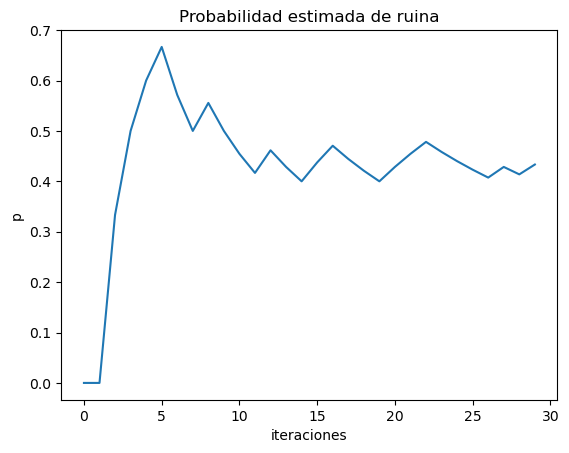

In [105]:
print("Ganancia esperada:", lruina[-1])
plt.plot(lruina)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad estimada de ruina')
plt.show()


### Segunda solucion

In [107]:
# Esta función simula un solo juego y devuele la cantidad de munedas que tiene el jug1., tambien devuelve la cantida de volados 
# que se necesitaron

#El argumento grafica sirve para que sólo se grafique el primer experimento
def ruina_j_infty(grafica,m1=2,m2=3, p=0.5):
    ganancia=m1 
    m_total=m1+m2 
    cuenta_volds=0 
    
    #lista que sirve para graficar el juego
    lgan=[ganancia]
    
    while ganancia>0 and cuenta_volds<10000:
        if random.random()<p:
            ganancia += 1 
        else:
            ganancia -= 1 
        cuenta_volds +=1 
        if grafica==0:
            lgan.append(ganancia)

            
    return ganancia, cuenta_volds, lgan

In [108]:
#esta función simula muchas veces la funcion anterior
def simu_ruina_j_infy(N,m1=2,m2=3,p=0.5):
    
    #listas para guardar la aproximación en cada iteracion
    lruina=[]

    ruina=0
    
    for i in range(N):
        (ganancia, cuenta_volds, l)=ruina_j_infty(i, m1, m2, p)
        
        #La sig. condicion indicara en cada juego si el juegador gana o queda en ruina
        if ganancia==0:
            ruina+=1
        
        #El condicional sirve para saber si graficar o no el juego
        if i==0:
            lgan=l
        
        lruina.append(ruina/(i+1))
        
    return lruina, lgan

In [123]:
N=10000
(lruina, lgan)=simu_ruina_j_infy(N,m1=200,m2=5000,p=0.5)

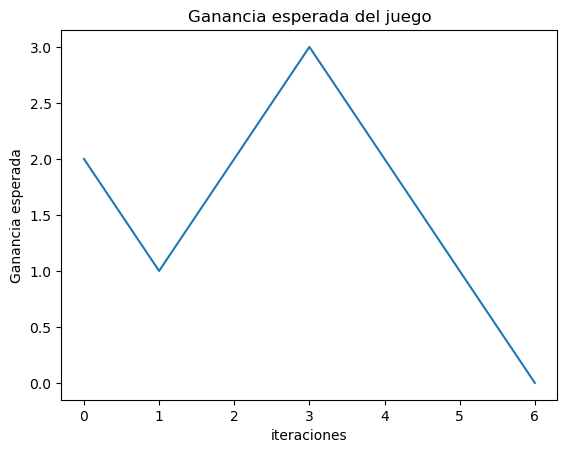

Prob. ruina: 0.9826


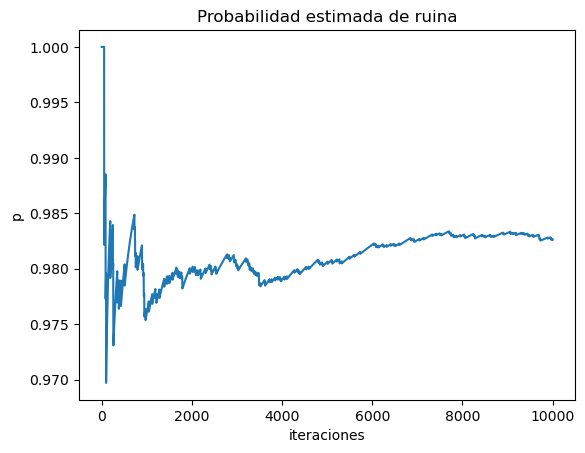

In [124]:
plt.plot(lgan)
plt.xlabel('iteraciones')
plt.ylabel('Ganancia esperada')
plt.title('Ganancia esperada del juego')
plt.show()


print("Prob. ruina:", lruina[-1])
plt.plot(lruina)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad estimada de ruina')
plt.show()
